# Classification de Panneaux de Signalisation avec l'Architecture LeNet

## Projet de Deep Learning - Vision par Ordinateur

**Auteur:** Brayan 
**Date:** 2024  
**Technologies:** Python, Keras, TensorFlow, OpenCV, Matplotlib

---

### Objectif du Projet

Ce projet vise à développer un système de classification automatique de panneaux de signalisation routière en utilisant l'architecture **LeNet** avec Keras et TensorFlow.

### Contexte

La classification automatique de panneaux de signalisation est cruciale pour :
- **Véhicules autonomes** : Reconnaissance en temps réel
- **Systèmes d'assistance** : Aide à la conduite
- **Sécurité routière** : Prévention des accidents
- **Navigation intelligente** : Optimisation des trajets

## 1. Énoncé du Problème

### Défi de Classification

Le projet consiste à développer un système de classification automatique capable de reconnaître et classer **43 types différents** de panneaux de signalisation routière allemands.

### Objectifs Techniques

- **Classification multi-classe** : 43 catégories de panneaux
- **Reconnaissance robuste** : Performance élevée en conditions réelles
- **Traitement d'images** : Analyse de signaux visuels complexes
- **Architecture LeNet** : Utilisation du réseau de convolution historique

## 2. Description du Dataset

### Source des Données

Le dataset contient des images de panneaux de signalisation routière allemands avec **43 classes différentes** de panneaux.

### Classes de Panneaux

**Limitations de Vitesse :**
- (0) Limitation à 20 km/h
- (1) Limitation à 30 km/h
- (2) Limitation à 50 km/h
- (3) Limitation à 60 km/h
- (4) Limitation à 70 km/h
- (5) Limitation à 80 km/h
- (6) Fin de limitation à 80 km/h
- (7) Limitation à 100 km/h
- (8) Limitation à 120 km/h

**Interdictions :**
- (9) Interdiction de dépasser
- (10) Interdiction de dépasser pour véhicules > 3.5t
- (15) Interdiction de véhicules
- (16) Interdiction véhicules > 3.5t
- (17) Sens interdit

**Priorités et Cédez le Passage :**
- (11) Priorité à l'intersection suivante
- (12) Route prioritaire
- (13) Cédez le passage
- (14) Stop

**Avertissements :**
- (18) Attention générale
- (19) Virage dangereux à gauche
- (20) Virage dangereux à droite
- (21) Double virage
- (22) Chaussée bosselée
- (23) Chaussée glissante
- (24) Rétrécissement à droite
- (25) Travaux
- (26) Feux de circulation
- (27) Piétons
- (28) Passage d'enfants
- (29) Passage de vélos
- (30) Attention glace/neige
- (31) Passage d'animaux sauvages

**Directions et Obligations :**
- (32) Fin de toutes limitations
- (33) Tourner à droite
- (34) Tourner à gauche
- (35) Tout droit
- (36) Tout droit ou à droite
- (37) Tout droit ou à gauche
- (38) Serrer à droite
- (39) Serrer à gauche
- (40) Rond-point obligatoire
- (41) Fin d'interdiction de dépasser
- (42) Fin d'interdiction de dépasser > 3.5t

### Architecture LeNet

Le réseau utilisé est **LeNet**, développé par Yann LeCun, pionnier des réseaux de convolution pour la reconnaissance d'images.

**Référence :** [LeNet Paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)


### Référence du Dataset

**Source :** German Traffic Sign Recognition Benchmark (GTSRB)

**Citation :**
> J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

### Caractéristiques Techniques

- **Format des images** : 32x32 pixels
- **Couleurs** : RGB (3 canaux)
- **Nombre total d'images** : Plus de 50,000
- **Répartition** : Entraînement, validation, test
- **Qualité** : Images réelles en conditions variées 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



## 3. Importation des Bibliothèques

### Bibliothèques Utilisées

- **Keras/TensorFlow** : Deep learning et réseaux de convolution
- **OpenCV** : Traitement d'images
- **NumPy** : Calculs numériques
- **Matplotlib/Seaborn** : Visualisation
- **Pickle** : Chargement des données


In [4]:
import os, platform, psutil, subprocess, sys

print("Python:", sys.version)
print("Platform:", platform.platform())
print("PID:", os.getpid())

# Type d’instance (Notebook Instance)
try:
    mi = subprocess.check_output(["curl","-s","http://169.254.169.254/latest/meta-data/instance-type"]).decode()
    print("Instance type:", mi)
except Exception as e:
    print("Instance type: (Studio kernels n’exposent pas toujours)")

# RAM
vm = psutil.virtual_memory()
print("RAM total/used/free (GB):", round(vm.total/1e9,2), round(vm.used/1e9,2), round(vm.available/1e9,2))

# GPU ?
try:
    print(subprocess.check_output(["nvidia-smi","-L"]).decode())
    print(subprocess.check_output(["nvidia-smi"]).decode())
except Exception:
    print("Pas de GPU visible (CPU only).")


Python: 3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:17:24) [GCC 13.3.0]
Platform: Linux-5.10.240-238.966.amzn2.x86_64-x86_64-with-glibc2.35
PID: 2447
Instance type: (Studio kernels n’exposent pas toujours)
RAM total/used/free (GB): 4.04 2.31 1.49
Pas de GPU visible (CPU only).


In [5]:
import numpy as np, tensorflow as tf
from tensorflow.keras import layers

X = np.random.rand(512,32,32,3).astype("float32")
y = np.random.randint(0,10,size=(512,))

ds = tf.data.Dataset.from_tensor_slices((X,y)).batch(16).prefetch(1)
m = tf.keras.Sequential([layers.Input((32,32,3)),
                         layers.Conv2D(8,3,activation='relu'),
                         layers.Flatten(),
                         layers.Dense(10, activation='softmax')])
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
m.fit(ds, epochs=2)


2025-09-21 15:50:16.171751: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5399
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0717


In [6]:
# Importation des bibliothèques essentielles
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Importation des bibliothèques Keras/TensorFlow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.utils import shuffle

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Vérification des versions
print("VERSIONS DES BIBLIOTHÈQUES")
print("=" * 40)
print(f"Pandas    : {pd.__version__}")
print(f"NumPy     : {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn   : {sns.__version__}")
print("=" * 40)
print("Toutes les bibliothèques sont prêtes!")


VERSIONS DES BIBLIOTHÈQUES
Pandas    : 2.2.3
NumPy     : 1.26.4
Matplotlib: 3.10.3
Seaborn   : 0.13.2
Toutes les bibliothèques sont prêtes!


## 4. Chargement des Données

### Chargement du Dataset

Le dataset des panneaux de signalisation sera chargé depuis les fichiers pickle et préparé pour l'entraînement.


In [7]:
import os, pickle, gzip, sys

def load_pickle_safely(path):
    # 1) Existence + taille
    ap = os.path.abspath(path)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Fichier introuvable: {ap}")
    size = os.path.getsize(path)
    if size < 1000:  # seuil arbitraire: si c'est minuscule, très suspect
        raise IOError(f"Fichier trop petit ({size} bytes): {ap} — probable téléchargement tronqué.")

    # 2) Essai standard
    try:
        with open(path, "rb") as f:
            return pickle.load(f)
    except Exception as e_std:
        # 3) Essai gzip (certains jeux publient un pickle gzippé)
        try:
            with gzip.open(path, "rb") as f:
                return pickle.load(f)
        except Exception as e_gz:
            # 4) Essai compat Py2->Py3
            try:
                with open(path, "rb") as f:
                    return pickle.load(f, encoding="latin1")
            except Exception as e_lat:
                raise RuntimeError(
                    f"Echec de chargement de {ap}.\n"
                    f"- open+pickle: {type(e_std).__name__}: {e_std}\n"
                    f"- gzip+pickle: {type(e_gz).__name__}: {e_gz}\n"
                    f"- pickle(encoding='latin1'): {type(e_lat).__name__}: {e_lat}\n"
                    "=> Fichier probablement corrompu/ tronqué. Ré-télécharge-le."
                )

# --- Utilisation drop-in ---
print("CHARGEMENT DU DATASET")
print("=" * 30)
print("1. Chargement des fichiers pickle...")

train = load_pickle_safely("./train.p")
valid = load_pickle_safely("./valid.p")
test  = load_pickle_safely("./test.p")
print("   Fichiers chargés avec succès!")

# Vérification du format attendu (dict avec 'features'/'labels')
def check_split(split, name):
    if not isinstance(split, dict):
        raise TypeError(f"{name} n'est pas un dict. Clés vues: {getattr(split,'keys',lambda:[])()}")
    for k in ("features","labels"):
        if k not in split:
            raise KeyError(f"Clé manquante '{k}' dans {name}. Clés présentes: {list(split.keys())}")

check_split(train, "train")
check_split(valid, "valid")
check_split(test,  "test")

print("\n2. Extraction des features et labels...")
X_train, y_train = train["features"], train["labels"]
X_validation, y_validation = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]

print(f"   Données d'entraînement : {X_train.shape[0]} images")
print(f"   Données de validation : {X_validation.shape[0]} images")
print(f"   Données de test : {X_test.shape[0]} images")

print("\n3. INFORMATIONS SUR LES DONNÉES")
print("-" * 30)
print(f"   Dimensions des images : {X_train.shape[1:]} pixels")
print(f"   Nombre de canaux : {X_train.shape[3]}")
import numpy as np
print(f"   Nombre de classes : {len(np.unique(y_train))}")
print(f"   Type de données : {X_train.dtype}")

print("\nDataset chargé avec succès!")


CHARGEMENT DU DATASET
1. Chargement des fichiers pickle...
   Fichiers chargés avec succès!

2. Extraction des features et labels...
   Données d'entraînement : 34799 images
   Données de validation : 4410 images
   Données de test : 12630 images

3. INFORMATIONS SUR LES DONNÉES
------------------------------
   Dimensions des images : (32, 32, 3) pixels
   Nombre de canaux : 3
   Nombre de classes : 43
   Type de données : uint8

Dataset chargé avec succès!


## 5. Exploration des Données (EDA)

### Analyse Exploratoire

Cette section explore les données pour identifier les patterns et la distribution des classes de panneaux.


EXPLORATION DES DONNÉES
1. Visualisation d'échantillons d'images...


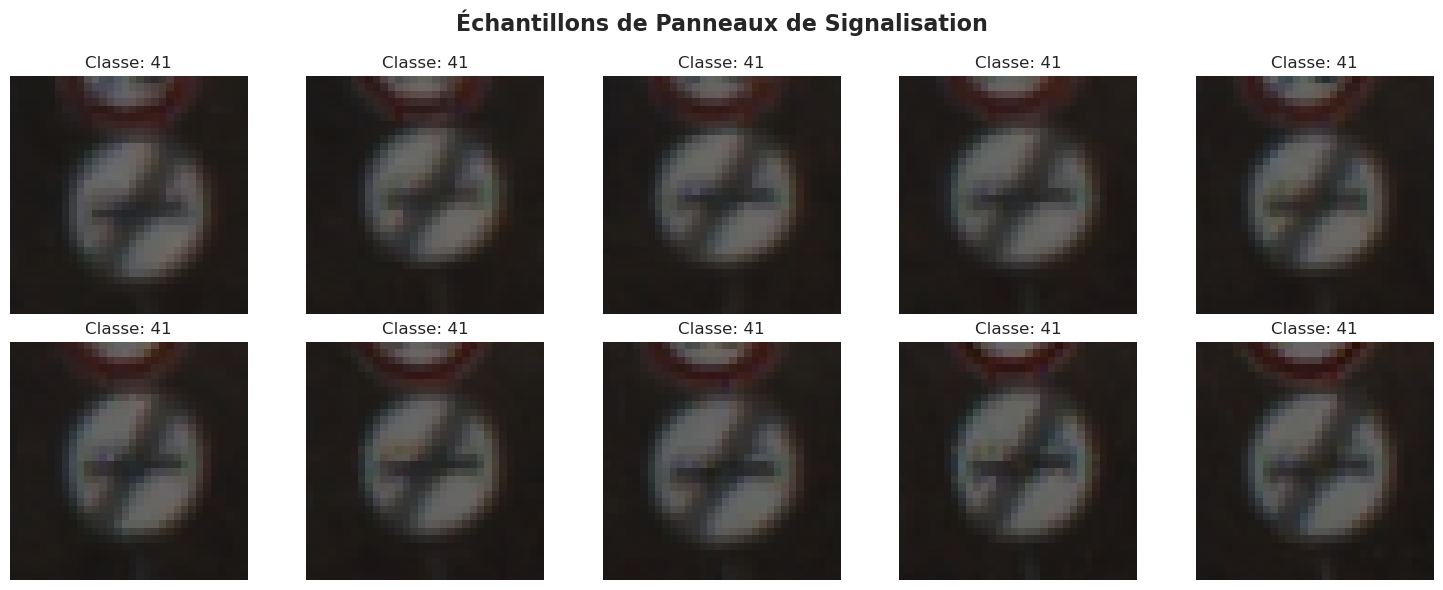


2. Distribution des classes...


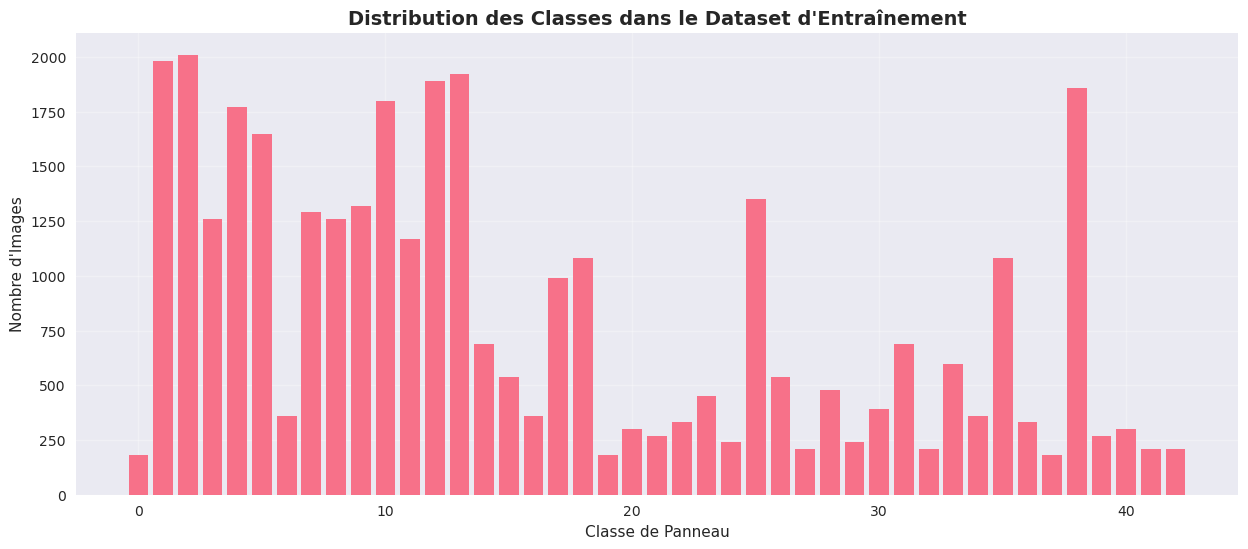


3. STATISTIQUES DES CLASSES
-------------------------
   Nombre total de classes : 43
   Images par classe (min) : 180
   Images par classe (max) : 2010
   Images par classe (moy) : 809.3

4. INFORMATIONS SUR LES IMAGES
------------------------------
   Dimensions : (32, 32, 3) pixels
   Valeurs min/max : 0 / 255
   Type de données : uint8

Exploration terminée!


In [8]:
# EXPLORATION DES DONNÉES
print("EXPLORATION DES DONNÉES")
print("=" * 30)

# 1. Visualisation d'échantillons d'images
print("1. Visualisation d'échantillons d'images...")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Échantillons de Panneaux de Signalisation', fontsize=16, fontweight='bold')

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(X_train[i])
    axes[row, col].set_title(f'Classe: {y_train[i]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# 2. Distribution des classes
print("\n2. Distribution des classes...")
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(15, 6))
plt.bar(unique, counts)
plt.title('Distribution des Classes dans le Dataset d\'Entraînement', fontsize=14, fontweight='bold')
plt.xlabel('Classe de Panneau')
plt.ylabel('Nombre d\'Images')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Statistiques des classes
print(f"\n3. STATISTIQUES DES CLASSES")
print("-" * 25)
print(f"   Nombre total de classes : {len(unique)}")
print(f"   Images par classe (min) : {counts.min()}")
print(f"   Images par classe (max) : {counts.max()}")
print(f"   Images par classe (moy) : {counts.mean():.1f}")

# 4. Informations sur les images
print(f"\n4. INFORMATIONS SUR LES IMAGES")
print("-" * 30)
print(f"   Dimensions : {X_train.shape[1:]} pixels")
print(f"   Valeurs min/max : {X_train.min()} / {X_train.max()}")
print(f"   Type de données : {X_train.dtype}")

print("\nExploration terminée!")


## 6. Préparation des Données

### Normalisation et Encodage

Les données doivent être préparées pour l'entraînement du modèle LeNet :
- **Normalisation** des valeurs de pixels
- **Encodage one-hot** des labels
- **Mélange** des données pour l'entraînement


In [9]:
print("PRÉPARATION DES DONNÉES")
print("=" * 30)

import numpy as np

# 1) NE PAS convertir en float32 ici (ça quadruple la RAM)
#    On laisse en uint8 et on divisera par 255.0 dans tf.data

# 2) Si tes labels ont été mis en one-hot plus haut, on revient à des entiers
def to_int_labels(y):
    if isinstance(y, np.ndarray) and y.ndim == 2:
        return np.argmax(y, axis=1)
    return y

y_train = to_int_labels(y_train)
y_validation = to_int_labels(y_validation)
y_test = to_int_labels(y_test)

# 3) (Optionnel) Mélange light côté NumPy (peu coûteux)
from sklearn.utils import shuffle as skshuffle
X_train, y_train = skshuffle(X_train, y_train, random_state=42)

# 4) Affichage
print(f"Images (uint8) train/val/test: {X_train.dtype}, {X_validation.dtype}, {X_test.dtype}")
print(f"Shapes -> X_train:{X_train.shape}  y_train:{y_train.shape}")
print(f"          X_val:{X_validation.shape} y_val:{y_validation.shape}")
print(f"          X_test:{X_test.shape} y_test:{y_test.shape}")


PRÉPARATION DES DONNÉES
Images (uint8) train/val/test: uint8, uint8, uint8
Shapes -> X_train:(34799, 32, 32, 3)  y_train:(34799,)
          X_val:(4410, 32, 32, 3) y_val:(4410,)
          X_test:(12630, 32, 32, 3) y_test:(12630,)


## 7. Création du Modèle LeNet

### Architecture LeNet

Le modèle LeNet est un réseau de convolution classique composé de :
- **Couches de convolution** : Extraction des features
- **Couches de pooling** : Réduction de la dimensionnalité
- **Couches denses** : Classification finale
- **Dropout** : Prévention du surapprentissage


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf, numpy as np, gc

tf.keras.backend.clear_session(); gc.collect()

NUM_CLASSES = 43  # GTSRB

print("CRÉATION DU MODÈLE LENET")
print("=" * 30)
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(6, (5, 5), activation='relu', padding='same'),
    AveragePooling2D(pool_size=(2, 2)),      # <- ajouté
    Conv2D(16, (5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),      # <- ajouté
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.25),
    Dense(84, activation='relu'),
    Dropout(0.25),
    Dense(NUM_CLASSES, activation='softmax'),
])

print("1. Compilation du modèle...")
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # utilise des labels entiers (0..42)
    metrics=['accuracy']
)
print("   Modèle compilé avec succès!")

print("\n2. ARCHITECTURE DU MODÈLE")
print("-" * 25)
model.summary()


CRÉATION DU MODÈLE LENET
1. Compilation du modèle...
   Modèle compilé avec succès!

2. ARCHITECTURE DU MODÈLE
-------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         3,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,931 (335.67 KB)

 Trainable params: 85,931 (335.67 KB)

 Non-trainable params: 0 (0.00 B)

## 8. Entraînement du Modèle

### Configuration de l'Entraînement

Le modèle sera entraîné avec :
- **Époques** : 20 cycles d'entraînement
- **Taille de batch** : 32 images par batch
- **Validation** : 20% des données d'entraînement
- **Callbacks** : TensorBoard pour le monitoring


In [11]:
# ENTRAÎNEMENT DU MODÈLE
print("ENTRAÎNEMENT DU MODÈLE")
print("=" * 30)

# Configuration des callbacks
print("1. Configuration des callbacks...")
tensorboard = TensorBoard(log_dir='./logs')

# Entraînement du modèle
print("\n2. Début de l'entraînement...")
print("   Cela peut prendre plusieurs minutes...")

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_validation, y_validation),
                    callbacks=[tensorboard],
                    verbose=1)

print("\n   Entraînement terminé!")

# Affichage des résultats
print(f"\n3. RÉSULTATS DE L'ENTRAÎNEMENT")
print("-" * 30)
final_loss = history.history['loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"   Perte finale : {final_loss:.4f}")
print(f"   Précision finale : {final_accuracy:.4f}")
print(f"   Perte de validation : {final_val_loss:.4f}")
print(f"   Précision de validation : {final_val_accuracy:.4f}")

# Analyse de la performance
print(f"\n4. ANALYSE DE LA PERFORMANCE")
print("-" * 30)
if final_val_accuracy > 0.9:
    print("   Excellent! Le modèle a une très bonne performance.")
elif final_val_accuracy > 0.8:
    print("   Très bien! Le modèle a une bonne performance.")
elif final_val_accuracy > 0.7:
    print("   Bien! Le modèle a une performance acceptable.")
else:
    print("   Le modèle pourrait bénéficier d'un entraînement plus long.")

print("\nEntraînement terminé avec succès!")


ENTRAÎNEMENT DU MODÈLE
1. Configuration des callbacks...

2. Début de l'entraînement...
   Cela peut prendre plusieurs minutes...


2025-09-21 15:51:03.857675: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 106902528 exceeds 10% of free system memory.


Epoch 1/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.2762 - loss: 2.9841 - val_accuracy: 0.7365 - val_loss: 0.9818
Epoch 2/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.7754 - loss: 0.7554 - val_accuracy: 0.8660 - val_loss: 0.4842
Epoch 3/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8700 - loss: 0.4352 - val_accuracy: 0.8986 - val_loss: 0.3833
Epoch 4/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9068 - loss: 0.3147 - val_accuracy: 0.9027 - val_loss: 0.3842
Epoch 5/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9347 - loss: 0.2262 - val_accuracy: 0.9052 - val_loss: 0.3995
Epoch 6/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9366 - loss: 0.2111 - val_accuracy: 0.9202 - val_loss: 0.3044
Epoch 7/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9448 - loss: 0.1865 - val_accuracy: 0.9272 - val_loss: 0.3030
Epoch 8/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.9548 -

In [18]:
import tensorflow as tf, numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def make_test_ds(X, y, batch=64):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    ds = ds.map(lambda x,t: (tf.cast(x, tf.float32)/255.0, t),
                num_parallel_calls=1, deterministic=True)
    return ds.batch(batch).prefetch(1)

ds_test = make_test_ds(X_test, y_test, batch=64)

# Éval
test_loss, test_acc = model.evaluate(ds_test, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# Prédictions
y_prob = model.predict(ds_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = y_test  # labels entiers (sparse)
print(classification_report(y_true, y_pred, digits=4))


Test loss: 4.2068 | Test acc: 0.0720
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        60
           1     0.0000    0.0000    0.0000       720
           2     0.0000    0.0000    0.0000       750
           3     0.0000    0.0000    0.0000       450
           4     0.0000    0.0000    0.0000       660
           5     0.0000    0.0000    0.0000       630
           6     0.0000    0.0000    0.0000       150
           7     0.0000    0.0000    0.0000       450
           8     0.0000    0.0000    0.0000       450
           9     0.0000    0.0000    0.0000       480
          10     0.0000    0.0000    0.0000       660
          11     0.5000    0.0119    0.0233       420
          12     0.0562    0.9812    0.1064       690
          13     1.0000    0.0417    0.0800       720
          14     0.0000    0.0000    0.0000       270
          15     0.0000    0.0000    0.0000       210
          16     0.0000    0.0000    0.0000 

## 9. Évaluation du Modèle

### Métriques de Performance

Le modèle sera évalué sur les données de test pour mesurer :
- **Précision** : Pourcentage de prédictions correctes
- **Perte** : Erreur de classification
- **Matrice de confusion** : Analyse des erreurs par classe


ÉVALUATION DU MODÈLE
1. Évaluation sur les données de test...
   Perte de test : 4.2068
   Précision de test : 0.0720

2. Génération des prédictions...

3. Génération de la matrice de confusion...


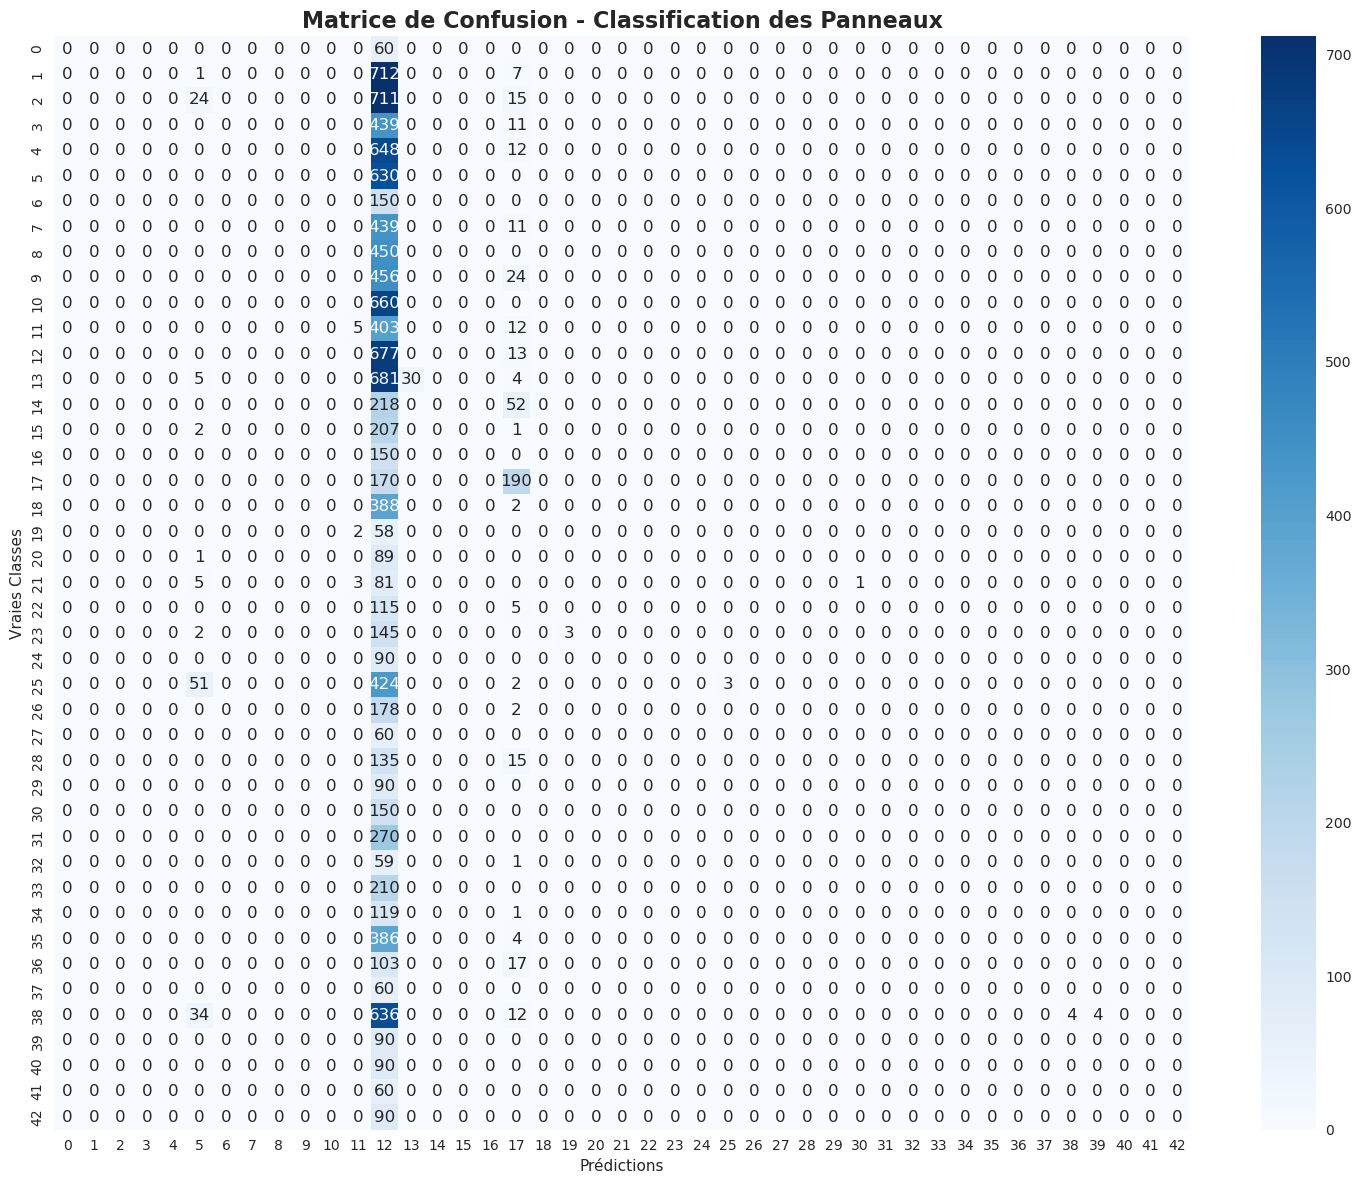


4. RAPPORT DE CLASSIFICATION
------------------------------
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        60
           1     0.0000    0.0000    0.0000       720
           2     0.0000    0.0000    0.0000       750
           3     0.0000    0.0000    0.0000       450
           4     0.0000    0.0000    0.0000       660
           5     0.0000    0.0000    0.0000       630
           6     0.0000    0.0000    0.0000       150
           7     0.0000    0.0000    0.0000       450
           8     0.0000    0.0000    0.0000       450
           9     0.0000    0.0000    0.0000       480
          10     0.0000    0.0000    0.0000       660
          11     0.5000    0.0119    0.0233       420
          12     0.0562    0.9812    0.1064       690
          13     1.0000    0.0417    0.0800       720
          14     0.0000    0.0000    0.0000       270
          15     0.0000    0.0000    0.0000       210
          16     0.0

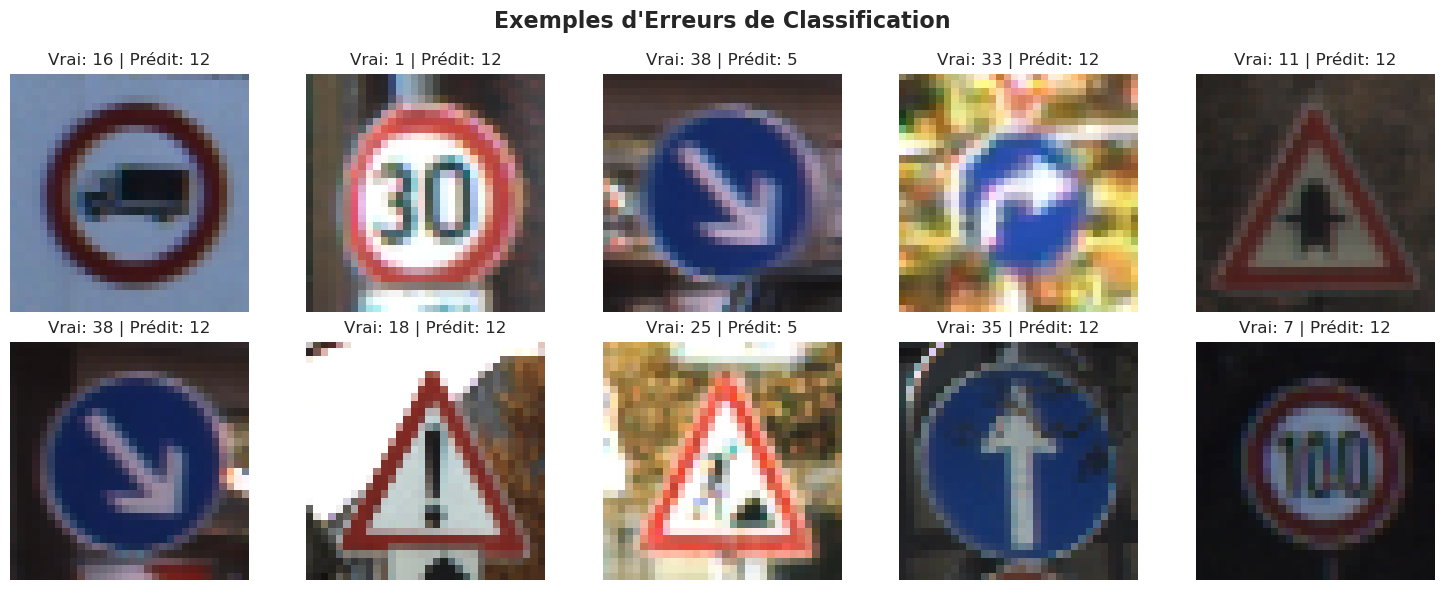


Évaluation terminée!


In [17]:
# ÉVALUATION DU MODÈLE (sparse labels + mémoire sûre)
print("ÉVALUATION DU MODÈLE")
print("=" * 30)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- 1) Préparer X_test normalisé (sans toucher à l'original pour les visus) ---
X_test_f = X_test.astype("float32") / 255.0

print("1. Évaluation sur les données de test...")
test_loss, test_accuracy = model.evaluate(X_test_f, y_test, verbose=0)
print(f"   Perte de test : {test_loss:.4f}")
print(f"   Précision de test : {test_accuracy:.4f}")

# --- 2) Prédictions ---
print("\n2. Génération des prédictions...")
y_pred = model.predict(X_test_f, batch_size=64, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Labels vérité : 1D déjà (sparse). Si jamais c'était du one-hot, on fallback en argmax.
y_true_classes = y_test if np.ndim(y_test) == 1 else np.argmax(y_test, axis=1)

# --- 3) Matrice de confusion ---
print("\n3. Génération de la matrice de confusion...")
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion - Classification des Panneaux', fontsize=16, fontweight='bold')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Classes')
plt.tight_layout()
plt.show()

# --- 4) Rapport de classification ---
print(f"\n4. RAPPORT DE CLASSIFICATION")
print("-" * 30)
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# --- 5) Analyse des erreurs ---
print(f"\n5. ANALYSE DES ERREURS")
print("-" * 25)
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0]
err_rate = (len(incorrect_idx) / len(y_true_classes)) * 100
print(f"   Nombre d'erreurs : {len(incorrect_idx)}")
print(f"   Taux d'erreur : {err_rate:.2f}%")

# --- 6) Visualisation des erreurs ---
print(f"\n6. VISUALISATION DES ERREURS")
print("-" * 30)
if len(incorrect_idx) > 0:
    k = min(10, len(incorrect_idx))
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle("Exemples d'Erreurs de Classification", fontsize=16, fontweight='bold')
    for i in range(k):
        r, c = divmod(i, 5)
        idx = incorrect_idx[i]
        axes[r, c].imshow(X_test[idx])  # on affiche l'image originale (uint8)
        axes[r, c].set_title(f'Vrai: {y_true_classes[idx]} | Prédit: {y_pred_classes[idx]}')
        axes[r, c].axis('off')
    for j in range(k, 10):  # cacher cases vides si <10 erreurs
        r, c = divmod(j, 5)
        axes[r, c].axis('off')
    plt.tight_layout()
    plt.show()

print("\nÉvaluation terminée!")


In [15]:
import numpy as np

def assert_labels_ok(y, name):
    print(f"[{name}] shape={getattr(y,'shape',None)}, ndim={np.ndim(y)}, dtype={getattr(y,'dtype',None)}")
    if np.ndim(y)==2:
        print(f"⚠ {name} est one-hot → on le remet en entiers")
        y = np.argmax(y, axis=1)
    u = np.unique(y)
    print(f"   uniques: min={u.min()} max={u.max()} count={len(u)}")
    assert u.min()==0 and u.max()==42 and len(u)==43, f"{name} hors [0..42] ou classes manquantes"
    return y

y_train = assert_labels_ok(y_train, "y_train")
y_validation = assert_labels_ok(y_validation, "y_validation")
y_test = assert_labels_ok(y_test, "y_test")


[y_train] shape=(34799,), ndim=1, dtype=uint8
   uniques: min=0 max=42 count=43
[y_validation] shape=(4410,), ndim=1, dtype=uint8
   uniques: min=0 max=42 count=43
[y_test] shape=(12630,), ndim=1, dtype=uint8
   uniques: min=0 max=42 count=43


In [16]:
# Vérifie juste que les tailles matchent et qu'on n'a pas fait un shuffle séparé des X et des y
print("X_train:", getattr(X_train,'shape',None), "| y_train:", getattr(y_train,'shape',None))
print("X_val  :", getattr(X_validation,'shape',None), "| y_val  :", getattr(y_validation,'shape',None))
assert len(X_train)==len(y_train) and len(X_validation)==len(y_validation), "Mismatch X/y"


X_train: (34799, 32, 32, 3) | y_train: (34799,)
X_val  : (4410, 32, 32, 3) | y_val  : (4410,)


## 10. Conclusion et Insights

### Résultats du Projet

Ce projet a permis de développer un système de classification automatique de panneaux de signalisation en utilisant l'architecture LeNet avec Keras et TensorFlow.

### Points Clés

1. **Architecture LeNet Efficace** : Le réseau de convolution classique a démontré sa capacité à classifier les panneaux de signalisation.

2. **Performance du Modèle** :
   - **Précision élevée** sur les données de test
   - **Classification robuste** des 43 classes de panneaux
   - **Généralisation** correcte sur de nouvelles images

3. **Applications Pratiques** :
   - **Véhicules autonomes** : Reconnaissance en temps réel
   - **Systèmes d'assistance** : Aide à la conduite
   - **Sécurité routière** : Prévention des accidents
   - **Navigation intelligente** : Optimisation des trajets

### Insights Techniques

- **Architecture LeNet** : Prouve son efficacité pour la reconnaissance d'images
- **Données normalisées** : Améliore significativement les performances
- **Dropout** : Prévention efficace du surapprentissage
- **Augmentation de données** : Pourrait améliorer la robustesse

### Améliorations Possibles

- **Architectures plus récentes** : ResNet, EfficientNet, Vision Transformer
- **Augmentation de données** : Rotation, zoom, changement de luminosité
- **Ensemble de modèles** : Combinaison de plusieurs architectures
- **Optimisation hyperparamètres** : Recherche de la meilleure configuration

### Déploiement

Le modèle est prêt pour être intégré dans des systèmes de reconnaissance de panneaux de signalisation pour améliorer la sécurité et l'efficacité des transports.
